In [1]:
import sys
print (sys.version) 

3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


# Coding up a Color Selection

We will use the image below to modify the colour threshold.

![image of a normal road](https://raw.githubusercontent.com/dcarlyle/dcarlyle.github.io/master/assets/images/driverless_cars/test_road.jpg "image of a normal road")


## Set up the environment

Import the required libraries:

+ pyplot and image from matplotlib
+ also import numpy for manipulating the image


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

Read in the image, print out its type and dimensions. Then make a copy of the image to work with.

*NOTE: Always make a copy of arrays or other variables in Python. If instead, you say "a = b" then all changes you make to "a" will be reflected in "b" as well!*

In [3]:
# Read in the image and print out some stats
image = mpimg.imread('test_road.jpg')
print('This image is: ',type(image), 
         'with dimensions:', image.shape)

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
# Note: always make a copy rather than simply using "="
color_select = np.copy(image)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


Define a colour threshold in the variables:
+ ```red_threshold```, 
+ ```green_threshold```,  
+ ```blue_threshold``` 
    
use these values to populate the vector ```rgb_threshold``` with the minimum allowable red, green, and blue (R,G,B) values.

In [6]:
# Define our color selection criteria
# Note: if you run this code, you'll find these are not sensible values!!

red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

Select any pixels below the threshold and set them to zero. The image is a numpy ndarray which holds the image colours as:

* red image[:,:,0]
* green image[:,:,1]
* blue image[:,:,2]

The remaining image will only retain pixels that are above the threshold, everything else will be blacked out.

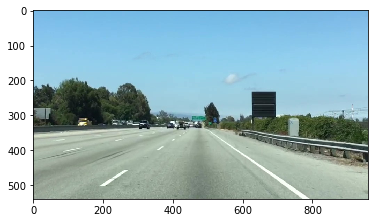

In [8]:
# Identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)
plt.show()


The image has not been altered as the threshold was set to 0, so all pixels were included.

The ideal result would be below.

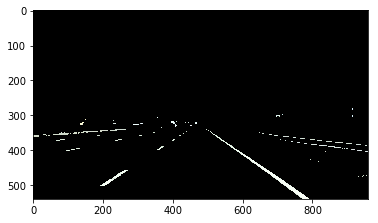

In [9]:
# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Identify pixels below the threshold
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image                 
plt.imshow(color_select)
plt.show()

# Masking an area of interest

The simple color selection eliminates almost everything in the image accept the lane lines.

There are still some other objects in the image that are not lane markings, so it would be tricky to extract the lane markings automatically.

## Assumptions
Assumming that the front facing camera is in a fixed position on the front of the car, such that the lanes always appear in the same general direction, we can take advantage by considering only pixels in the region we expect to find the lanes.

The variables ```left_bottom```, ```right_bottom```, and ```apex``` represent the vertices of a triangular region that we will retain for color selection, everything else will be masked out. A triangular mask illustrates the simplest case, but any polygon can be used.



Improving on the area in the image to focus on. We assume:

* the cameraa is mounted centrally
* the horizon is half way up the y axis
* the apex of the triangle is 10% of image height above horizon
* the base of the triangle is equal to x

In [12]:
# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
left_bottom = [(xsize*.1), (ysize)]
right_bottom = [(xsize*.9), ysize]
apex = [(xsize/2), (ysize*0.6)]

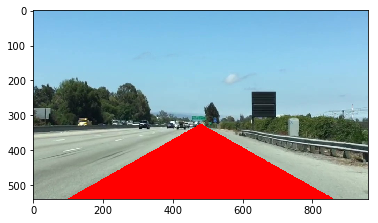

In [13]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

# Display the image
plt.imshow(region_select)

plt.show()

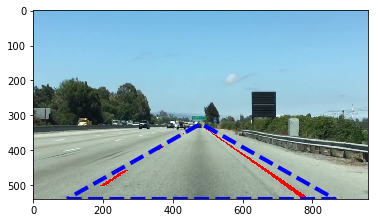

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Read in the image
image = mpimg.imread('test_road.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [(xsize*.1), (ysize)]
right_bottom = [(xsize*.9), ysize]
apex = [(xsize/2), (ysize*0.6)]



# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
# We use python's tilda operator to obtain the 2's compliment to reverse the bits.
# ~region_thresholds shows the area that is NOT in the triangle
# we want the region threshold and where there are pixels below the color threshold (which are the lanes )
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]

# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]


# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.imshow(color_select)
plt.imshow(line_image)
plt.show()


# What if the road markings are a different colour?
Even the amount of day light can alter the colour of the lane markings.

## Computer vision.
Python with OpenCV for computer vision work. OpenCV stands for Open-Source Computer Vision. From [opencv.org](http://opencv.org/).

### Edge detection
The first technique to use is *Canny edge detection* (John F. Canny developed this algorithm in 1986). With edge detection the goal is to identify the boundaries of an object in an image. The steps are:

+ First convert to grey scale
+ Then compute the gradient (this gives us an outline of the objects in an image), the brightness of a pixel corresponds to the gradient at that point. We trace an object by finding the pixels that follow the strongest gradients (easier to find in a gey scale image)

An edge is defined by how different the colour of adjacent pixels are. Images are 2 dimensional, so taking the direvative of X and Y similutansously we can find the gradient of the image.

![gradient_image](gradient_image.png "image of greyscaled and then gradient dif")


The Canny algorithm allows us to select just the pixels showing the strongest changes. We see the strongest changes at A, C and E below.

![canny](canny.png "canny")

# Conda install of openCV

Quick reference of Conda comands - ![cheatsheet](https://conda.io/docs/_downloads/conda-cheatsheet.pdf "cheatsheet")

+ In terminal update the environment ```> conda update conda```
+ Either create or use an existing environment
    + List environments ```> conda env list```
    + to use an environment ```> source activate env_name```
    
    + to create an environment ```> conda create --name py_openCV python=3.5```
    
+ Install the package installer ```![Homebrew](http://brew.sh/ "Homebrew")```
+ Install OpenCV ```> brew install opencv```
+ Quick check it went ok ```> ls -al /usr/local/Cellar/opencv```

+ **Note on linking with Python 2**
    + Python 3 is already linked but Python 2 will need a symlink to openCV
    + Create a symlink in ```PYTHONPATH``` either with ```> brew link opencv``` or
        + sudo ln -s /usr/local/Cellar/opencv/2.4.9/lib/python2.7/site-packages/cv.py /Library/Python/2.7/site-packages/cv.py
        + sudo ln -s /usr/local/Cellar/opencv/2.4.9/lib/python2.7/site-packages/cv2.so /Library/Python/2.7/site-packages/cv2.so 
    
+ **Quick test to see all went to plan**
```
    import cv2
    img = cv2.imread('path-to-image/helloworld.jpg')
    cv2.imshow('Test image', img)
```
+ **Note:** on Jupyter thread handling will be required:
```
    import cv2
    img = cv2.imread("exit-ramp.jpg")
    cv2.startWindowThread()
    cv2.namedWindow("preview")
    cv2.imshow("preview", img)
    cv2.waitKey(0)
```


+ **Check package folders**
```
    import site; site.getsitepackages()
```

## in Anaconda
Just use pip on the commandline
```
    > pip install opencv-python
```
Or
```
    > conda install -c menpo opencv3=3.1.0 
```

### Further reading
- https://youtu.be/OUbUFn71S4s
- http://www.pyimagesearch.com/2016/11/28/macos-install-opencv-3-and-python-2-7/
- http://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html
- https://github.com/hamuchiwa/AutoRCCar
- https://zhengludwig.wordpress.com/projects/self-driving-rc-car/

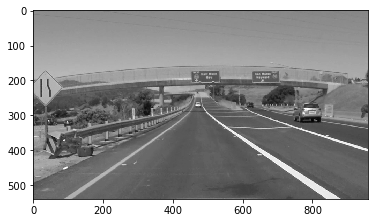

In [6]:
# Canny edge detection
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# First, we need to read in an image
image = mpimg.imread('exit-ramp.jpg')
plt.imshow(image)

# then grey scale
import cv2  #bringing in OpenCV libraries
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #grayscale conversion
plt.imshow(gray, cmap='gray')
plt.show()

### Now apply Canny edge detection
The algorithm will first detect strong edge (strong gradient) pixels above the high_threshold, and reject pixels below the low_threshold. Next, pixels with values between the low_threshold and high_threshold will be included as long as they are connected to strong edges. The output edges is a binary image with white pixels tracing out the detected edges and black everywhere else.

ref: [OpenCV Canny Docs](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html)

In our case, converting to grayscale has left us with an **8-bit** image, so each pixel can take ```2^8 = 256``` possible values. Hence, the pixel values range from 0 to 255.

This range implies that derivatives (essentially, the value differences from pixel to pixel) will be on the scale of tens or hundreds. **So, a reasonable range for your threshold parameters would also be in the tens to hundreds.**

For the thresholds, [John Canny](http://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html#steps) recommended a low to high ratio of 1:2 or 1:3.

### Gaussian smoothing
A way to suppress noise and spurious gradients is to average them out using Gaussian smoothing, this is run before using the Canny edge detection. *Note: cv2.Canny() does both for us*

Note that the Kernal_size can be set to any odd number, e.g. 3.





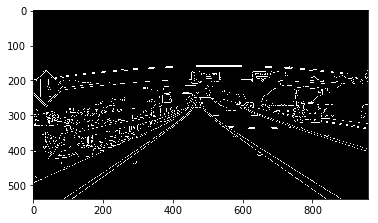

In [7]:
#doing all the relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image and convert to grayscale
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
# Note: this step is optional as cv2.Canny() applies a 5x5 Gaussian internally
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
plt.show()


# Using the Hough Transform to Find Lines from Canny Edges

**Y = mx + b**

In image space, a line is plotted as x vs. y, but in 1962, Paul Hough devised a method for representing lines in *parameter space*, which we will call *“Hough space”* in his honor.

In Hough space, I can represent my "x vs. y" line as a point in "m vs. b" instead. The Hough Transform is just the conversion from image space to Hough space. So, the characterization of a line in image space will be a single point at the position (m, b) in Hough space.

In parameter space, two parallel lines would be represented by two points at the same m (slope) value, but different b (intersection) values.

A single point in image space has many possible lines that pass through it, but not just any lines, only those with particular combinations of the m and b parameters. Rearranging the equation of a line, we find that a single point (x,y) corresponds to the line b = y - xm.

A point in image space describes a line in Hough space. So a line in an image is a point in Hough space and a point in an image is a line in Hough space…

Two points in image space correspond to two lines in Hough Space. Not only that, but these lines must intersect…
The intersection point at (m0, b0) represents the line y = m0x + b0 in image space and it must be the line that passes through both points!

### Find lines in image space
The strategy to find lines in image space is to look for intersections in Hough space.

![image_and_Hough_space](image_and_Hough_space.png "image_and_Hough_space")

This is done by dividing the Hough Space into a grid and find all lines passing through a given grid cell.

![Hough_space_grid_cell](Hough_space_grid_cell.png "Hough_space_grid_cell")

First we run Canny edge detection and define each point in the image space as a line in Hough space. Where many lines in Hough space intersect it indicates a number of points that make a line in the image space.

There is a problem though, vertical lines have an infinite slope, in M B representation. 

![infinite slope, in M B representation](infinite_slope_in_M_B_representation.png "infinite_slope_in_M_B_representation")

So we need a new parameterisation, this can be achieved by redefining the line in polar coordinates:

![line_as_polar_coodinates](line_as_polar_coodinates.png "line_as_polar_coodinates")

In image space:
+```xcosθ + ysinθ = p```

In Hough Space:
+```p /rho = the disance of the line from the origin```
+```θ  /theta = the angle away from the horizon```

Now each point in image space coresponds to a Sin curve in Hough space. A hole line of points translates to multiple Sin waves in Hough space.

![multiple_points_means_lots_of_sin](multiple_points_means_lots_of_sin.png "multiple_points_means_lots_of_sin")

The intersection in Hough space, gives the parameter of the line.

### What does a square look like in Hough space?
The four major intersections between curves in Hough space correspond to the four sides of the square.

![Image_space_of_points_making_a_square](Image_space_of_points_making_a_square.png "Image_space_of_points_making_a_square")![Square_as_Sin_inHough_space](Square_as_Sin_inHough_space.png "Square_as_Sin_inHough_space")

More information here:
* Ref: [Understanding Hough Transform With Python](https://alyssaq.github.io/2014/understanding-hough-transform/)

# Implementing a Hough Transform on Edge Detected Image

Parameters need to be defined to detect what kind of lines match lane lines (i.e. long lines, short lines, bendy lines, dashed lines, etc.). This can be achieved in OpenCV with a function called ```HoughLinesP.```

```lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)```

Operating on the image masked_edges (the output from Canny) and the output from HoughLinesP will be lines, which will simply be an array containing the endpoints (x1, y1, x2, y2) of all line segments detected by the transform operation. 

```rho``` and ```theta``` are the distance and angular resolution of the grid in Hough space. In Hough space, the grid is laid out along the (Θ, P) axis, rho in units of pixels and theta in units of radians.

rho takes a minimum value of 1, and a reasonable starting place for theta is 1 degree (pi/180 in radians). Scale these values up to be more flexible in your definition of what constitutes a line.

The ```threshold``` parameter specifies the minimum number of votes (intersections in a given grid cell) a candidate line needs to have to make it into the output. The empty ```np.array([])``` is just a placeholder, no need to change it. ```min_line_length``` is the minimum length of a line (in pixels). ```max_line_gap``` is the maximum distance (again, in pixels) between segments that you will allow to be connected into a single line.



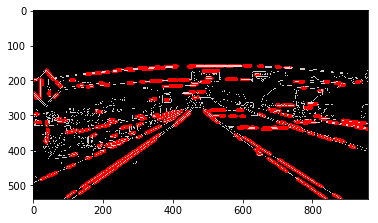

In [8]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)
plt.show()

# Finally add a mask to select only the lines of interest.

![completeCanny_Hough_mask_transform](completeCanny_Hough_mask_transform.png "completeCanny_Hough_mask_transform")

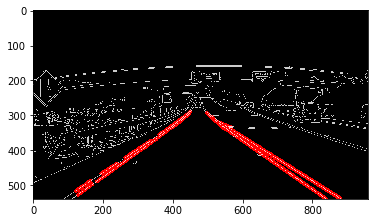

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time define a four sided polygon to mask the area to work on

ysize = image.shape[0]
xsize = image.shape[1]

left_bottom = [(xsize*.01), (ysize)]
right_bottom = [(xsize*.99), ysize]
apex_left = (450, 290)  #(xsize/2)
apex_right = (490, 290) #(ysize*0.4)

# MASK
vertices = np.array([[(0,ysize), (apex_left[0], apex_left[1]), (apex_right[0], apex_right[1]), (xsize,ysize)]], dtype=np.int32)


cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid (1 degree (pi/180 radians)).
threshold = 1     # minimum number of votes (intersections in Hough grid cell)
                  # meaning at least 15 points in image space need to be associated with each line segment.
    
min_line_length = 40 #minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)
plt.show()

# Software pipe line to track images in a video

+ cd /Users/**username**/Udacity_self_driving_cars
+ git clone https://github.com/udacity/CarND-LaneLines-P1.git

